In [1]:
import pandas as pd
import numpy as np


In [2]:
birth = pd.read_csv('births.csv')
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
birth['decade'] = 10 * (birth['year'] // 10)
birth.pivot_table('births', index='decade', columns ='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [6]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'total birth per year')

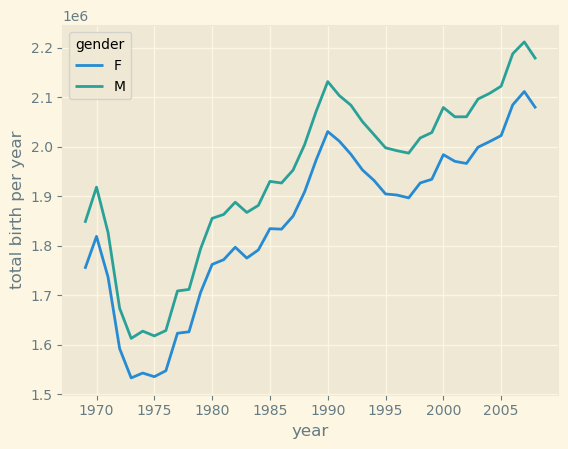

In [9]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
birth.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total birth per year')

In [12]:
# Compute quartiles for births
quartiles = np.percentile(birth['births'], [25, 50, 75])

# Median (Q2)
mu = quartiles[1]

# Robust standard deviation estimate (IQR method)
sig = 0.74 * (quartiles[2] - quartiles[0])

# Remove outliers using 5-sigma rule
birth = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')


In [16]:
# Convert 'day' column to integer (removes null values)
birth.loc[:, 'day'] = birth['day'].astype(int)


# Create a datetime index from year, month, and day
birth.index = pd.to_datetime(10000 * birth.year + 100 * birth.month + birth.day, format='%Y%m%d')

# Extract the day of the week (0 = Monday, 6 = Sunday)
birth.loc[:, 'dayofweek'] = birth.index.dayofweek



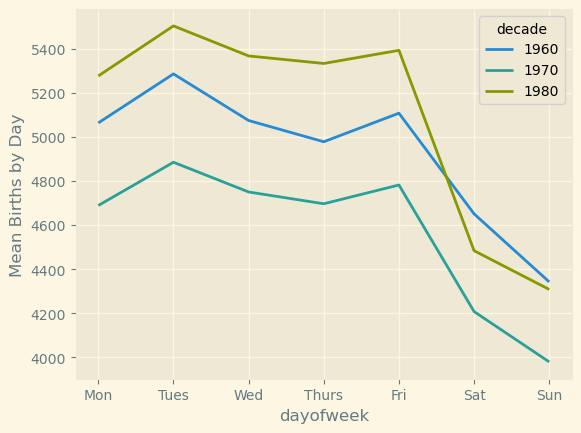

In [17]:
# Plot mean births by day of the week, grouped by decade
birth.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()

# Set x-axis labels
plt.xticks(ticks=range(7), labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

# Label y-axis
plt.ylabel('Mean Births by Day')
plt.show()


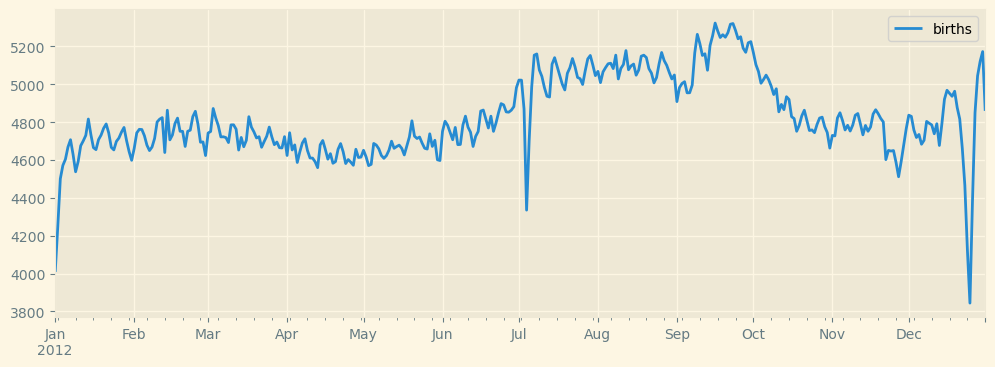

In [18]:
# Group births by month and day
births_by_date = birth.pivot_table('births', [birth.index.month, birth.index.day])

# Convert index to datetime (for plotting)
from datetime import datetime
births_by_date.index = [datetime(2012, month, day) for month, day in births_by_date.index]

# Plot the average births by date
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
plt.show()
